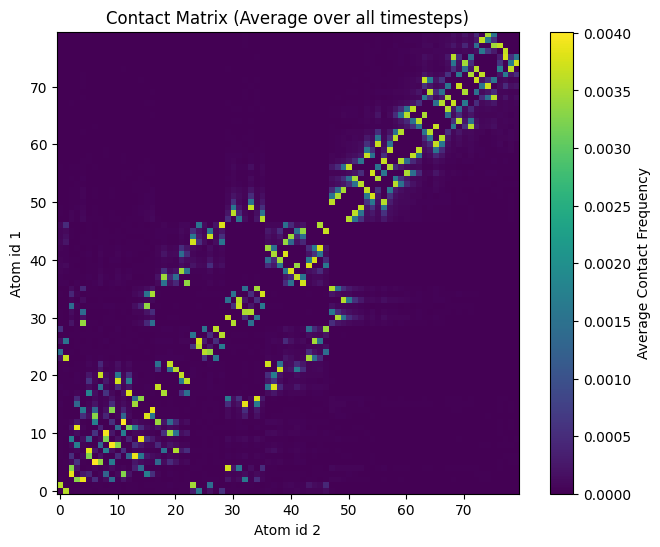

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables
contact_data = []
max_atom_id = 0

# Open the file
with open('pairwise.dump', 'r') as file:
    # Iterate over lines
    for line in file:
        # If the line starts with 'ITEM:' or '0.00:', skip it
        if line.startswith('ITEM:') or line.startswith('0.00:'):
            continue
        
        # Split the line and extract data
        data = line.strip().split()
        
        # Check if the line contains data
        if len(data) == 5:  # Ensure that there are exactly 5 values in the data
            # Extract atom ids and distance
            distance, id1, id2, _, _ = map(float, data)
            
            # Append atom data to the contact_data list
            contact_data.append((distance, id1, id2))
            
            # Update the maximum atom id
            max_atom_id = max(max_atom_id, int(id1), int(id2))

# Create an empty contact matrix
contact_matrix_all = np.zeros((max_atom_id, max_atom_id))

# Iterate over contact data and update the contact matrix
for _, id1, id2 in contact_data:
    contact_matrix_all[int(id1) - 1, int(id2) - 1] += 1

# Normalize the contact matrix by the number of entries
num_entries = len(contact_data)
contact_matrix_all /= num_entries

# Create a dictionary to map original atom IDs to contiguous indices
atom_id_mapping = {}

# Create an empty contact matrix
contact_matrix_all = np.zeros((max_atom_id, max_atom_id))

# Iterate over contact data and update the contact matrix
for _, id1, id2 in contact_data:
    # Map the original atom IDs to contiguous indices
    if id1 not in atom_id_mapping:
        atom_id_mapping[id1] = len(atom_id_mapping) + 1
    if id2 not in atom_id_mapping:
        atom_id_mapping[id2] = len(atom_id_mapping) + 1

    # Update the contact matrix using the mapped indices
    contact_matrix_all[atom_id_mapping[id1] - 1, atom_id_mapping[id2] - 1] += 1

# Normalize the contact matrix by the number of entries
num_entries = len(contact_data)
contact_matrix_all /= num_entries

# Plot the contact matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(contact_matrix_all, cmap='viridis', origin='lower')
plt.colorbar(label='Average Contact Frequency')
plt.xlabel('Atom id 2')
plt.ylabel('Atom id 1')
plt.title('Contact Matrix (Average over all timesteps)')
plt.xticks(range(0,len(atom_id_mapping),10))
plt.yticks(range(0,len(atom_id_mapping),10))
plt.grid(False)
plt.show()

